In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Loan_Prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
data[cols]=data[cols].fillna(data.mode().iloc[0])

In [6]:
cols = ['LoanAmount', 'Loan_Amount_Term']
data[cols]=data[cols].fillna(data.mean())

In [7]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


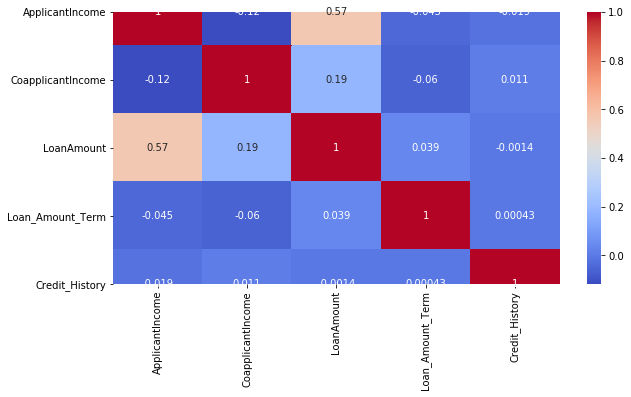

In [28]:
plt.figure(figsize=(10, 5))
corr=data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

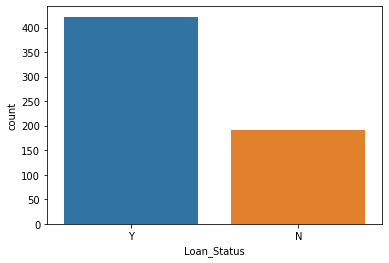

In [14]:
# Analyzing number of applicants with approved and non-approved loans
# The data is also highly imbalanced between applicants with approved and non-approved loans 
sns.countplot(data['Loan_Status'])
plt.show()

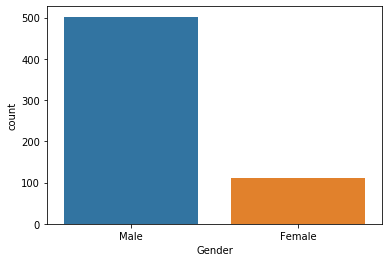

In [58]:
sns.countplot(x='Gender', data=data)
plt.show()

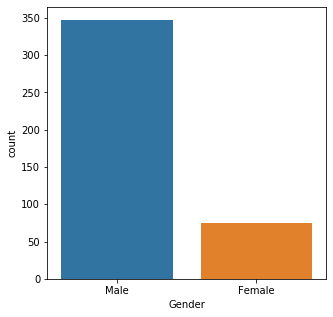

In [23]:
# Analyzing the loan status by gender
# Loan approvals are more in case of male applicants. However, this may be because number of male applicants are more 
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=data.loc[data['Loan_Status']=='Y'])
plt.show()

In [65]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [102]:
pd.pivot_table(data, index=['Loan_Status', 'Gender'], aggfunc='count')

ApplicantIncome  CoapplicantIncome  Credit_History  \
Loan_Status Gender                                                       
N           Female               37                 37              37   
            Male                155                155             155   
Y           Female               75                 75              75   
            Male                347                347             347   

                    Dependents  Education  LoanAmount  Loan_Amount_Term  \
Loan_Status Gender                                                        
N           Female          37         37          37                37   
            Male           155        155         155               155   
Y           Female          75         75          75                75   
            Male           347        347         347               347   

                    Loan_ID  Married  Property_Area  Self_Employed  
Loan_Status Gender                                                  
N           Female       37       37             37             37  
            Male        155      155            155            155  
Y           Female       75       75             75             75  
            Male        347      347            347            347

In [106]:
# The loan approval rate is slightly better in case of male candidates
print('Percentage of positive loan approvals for female applicants: ', (75/112)*100)
print('Percentage of positive loan approvals for male applicants: ', (347/502)*100)

Percentage of positive loan approvals for female applicants:  66.96428571428571
Percentage of positive loan approvals for male applicants:  69.12350597609563


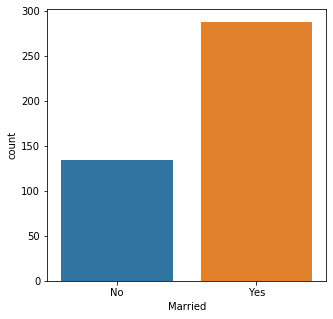

In [30]:
# Analyzing the loan status by marrital status
# Loan approvals are more in case of married applicants
plt.figure(figsize=(5, 5))
sns.countplot(x='Married', data=data.loc[data['Loan_Status']=='Y'])
plt.show()

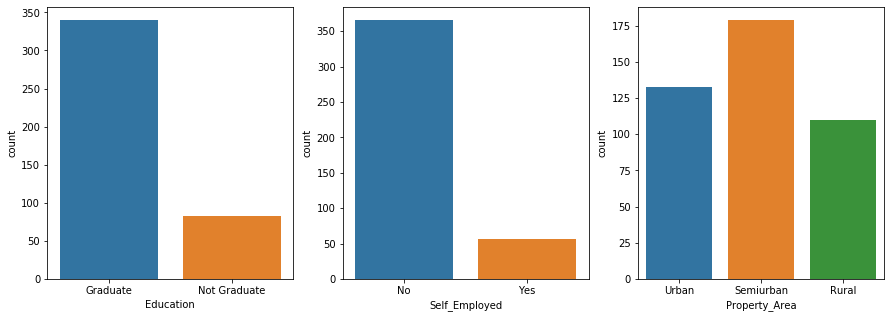

In [56]:
# Analyzing the loan status by marrital status
# Loan approvals are more in case of graduate applicants
# Loan approvals are less in case of self-employed applicants
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.countplot(x='Education', data=data.loc[data['Loan_Status']=='Y'], ax=ax[0])
sns.countplot(x='Self_Employed', data=data.loc[data['Loan_Status']=='Y'], ax=ax[1])
sns.countplot(x='Property_Area', data=data.loc[data['Loan_Status']=='Y'], ax=ax[2])
plt.show()

In [113]:
x = data.drop(columns=['Loan_Status', 'Loan_ID'])
y = data['Loan_Status']

In [114]:
x.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [115]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [116]:
x.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -1.160656
Credit_History      -2.021971
dtype: float64

In [117]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [120]:
# There are categorical variables in the dataset
x=pd.get_dummies(x,drop_first=True)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,4.993232,129600.0,1.0,1,0,0,0,0,0,0,0,1
1,8.430327,7.319202,4.859812,129600.0,1.0,1,1,1,0,0,0,0,0,0
2,8.006701,0.000000,4.204693,129600.0,1.0,1,1,0,0,0,0,1,0,1
3,7.857094,7.765993,4.795791,129600.0,1.0,1,1,0,0,0,1,0,0,1
4,8.699681,0.000000,4.955827,129600.0,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,7.972811,0.000000,4.276666,129600.0,1.0,0,0,0,0,0,0,0,0,0
610,8.320448,0.000000,3.713572,32400.0,1.0,1,1,0,0,1,0,0,0,0
611,8.996280,5.484797,5.537334,129600.0,1.0,1,1,1,0,0,0,0,0,1
612,8.933796,0.000000,5.236442,129600.0,1.0,1,1,0,1,0,0,0,0,1


In [121]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.516186,-1.107783,0.249219,0.243428,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
1,0.137806,0.782158,-0.022525,0.243428,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
2,-0.519479,-1.107783,-1.356846,0.243428,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,-0.528362,2.547117,-0.782016,1.428147
3,-0.751605,0.897526,-0.152922,0.243428,0.411733,0.472343,0.728816,-0.446339,-0.443713,-0.300975,1.892641,-0.392601,-0.782016,1.428147
4,0.555727,-1.107783,0.173033,0.243428,0.411733,0.472343,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572062,-1.107783,-1.210254,0.243428,0.411733,-2.117107,-1.372089,-0.446339,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,-0.700208
610,-0.032679,-1.107783,-2.357140,-2.540594,0.411733,0.472343,0.728816,-0.446339,-0.443713,3.322532,-0.528362,-0.392601,-0.782016,-0.700208
611,1.015921,0.308483,1.357423,0.243428,0.411733,0.472343,0.728816,2.240448,-0.443713,-0.300975,-0.528362,-0.392601,-0.782016,1.428147
612,0.918972,-1.107783,0.744578,0.243428,0.411733,0.472343,0.728816,-0.446339,2.253710,-0.300975,-0.528362,-0.392601,-0.782016,1.428147


In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [123]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
def maxrocaucscore(cm,x,y):
    max_roc_auc=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=roc_auc_score(y_test,y_pred)
        if fsc>max_roc_auc:
            max_roc_auc=fsc
            rs=r_state
    print('Maximum roc_auc score is :', max_roc_auc, 'at random state :', rs)

In [130]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='roc_auc')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.01, 'penalty': 'l2'}


In [131]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.01, penalty='l2')
maxrocaucscore(lr,x,y)

Maximum roc_auc score is : 0.7894736842105263 at random state : 16


In [132]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for LogisticRegression score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for LogisticRegression score is: 0.771200909513603
Standard deviation in roc_auc score is:  0.04978377244631672


In [133]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='roc_auc')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'gini', 'max_depth': 1}


In [134]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini', max_depth=1)
maxrocaucscore(dtc,x,y)

Maximum roc_auc score is : 0.7894736842105263 at random state : 16


In [136]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.70554134204289
Standard deviation in roc_auc score is:  0.04775734506674191


In [137]:
# Using SVC
from sklearn.svm import SVC
svc=SVC()
hyperparameterssvc = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf','poly','linear']}
gridsvc=GridSearchCV(svc, hyperparameterssvc, cv=5, scoring='roc_auc')
gridsvc.fit(x,y)
print(gridsvc.best_params_)

{'C': 0.01, 'kernel': 'rbf'}


In [139]:
from sklearn.svm import SVC
svc=SVC(C=0.01, kernel='rbf')
maxrocaucscore(svc,x,y)

Maximum roc_auc score is : 0.5 at random state : 0


In [140]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for SVC is:', cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for SVC is: 0.7442505018201613
Standard deviation in roc_auc score is:  0.041063649200599954


In [141]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parametersknn={'n_neighbors':[5,6,7,8,9,10]}
knn1 = GridSearchCV(knn, parametersknn, cv=5,scoring="roc_auc")
knn1.fit(x,y)
knn1.best_params_

{'n_neighbors': 10}

In [143]:
knn=KNeighborsClassifier(n_neighbors=10)
maxrocaucscore(knn,x,y)

Maximum roc_auc score is : 0.7835913312693499 at random state : 16


In [144]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for KNN is:', cross_val_score(knn,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for KNN is: 0.7075472334682862
Standard deviation in roc_auc score is:  0.054732857459217736


In [145]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="roc_auc")
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 100}

In [153]:
rfc=RandomForestClassifier(n_estimators=100)
maxrocaucscore(rfc,x,y)

Maximum roc_auc score is : 0.7936532507739938 at random state : 42


In [154]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Random Forest Classifier is: 0.7623692715952777
Standard deviation in roc_auc score is:  0.05235418518189739


In [150]:
# Among all the models, Logistic Regression is the best performing model
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 16,test_size=0.20,stratify=y)
lr=LogisticRegression(C=0.01, penalty='l2')
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       1.00      0.58      0.73        38
           1       0.84      1.00      0.91        85

    accuracy                           0.87       123
   macro avg       0.92      0.79      0.82       123
weighted avg       0.89      0.87      0.86       123

Confusion matrix 
 [[22 16]
 [ 0 85]]


In [162]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(lr, 'Loan_Prediction.pkl')

['Loan_Prediction.pkl']